# RUN in Google Colab

In [1]:
pip install imbalanced-learn==0.8.1

     |████████████████████████████████| 189 kB 13.9 MB/s 
     |████████████████████████████████| 23.1 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [3]:
import imblearn
imblearn.__version__

'0.8.1'

# Import package

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab/Orbit/kamis 07-10-2021/activity_km_07_01.csv")
df.head()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


### Mengganti nama kolom yang menggunakan spasi

In [7]:
df.columns = df.columns.str.replace(" ","_")
df.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


### Cek Missing Values

In [8]:
df.shape

(616, 7)

In [9]:
print("Total Rows           : ", df.shape[0])
print("Total Cols           : ", df.shape[1])
print("Total Missing Values : ", df.isnull().sum().sum())

Total Rows           :  616
Total Cols           :  7
Total Missing Values :  74


In [10]:
pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})

,Missing_values,Persentase_missing_values (%)
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


### cek value target 

In [11]:
df.aksi.value_counts().to_frame()

,aksi
Tidak melakukan apa-apa,473
Hidupkan Lampu,92
Hidupkan Lampu dan Pompa nutrisi TDS,39
Hidupkan Pompa nutrisi TDS,12


# Handle Missing Value 

In [12]:
miss = pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})
miss

,Missing_values,Persentase_missing_values (%)
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


### Suhu

In [13]:
mean_temp = float(df.suhu.mean())
mean_temp

29.364006791171466

In [14]:
df.suhu.fillna(value=mean_temp, inplace=True)

###  cahaya

In [15]:
mode_light = df.cahaya.mode()[0]
mode_light

'Ada'

In [16]:
df.cahaya.fillna(value=mode_light, inplace=True)

### PH

In [17]:
mean_ph = float(df.PH.mean())
mean_ph

6.655166666666665

In [18]:
df.PH.fillna(value=mean_ph, inplace=True)

### PPM

In [19]:
mean_ppm = float(df.PPM.mean())
mean_ppm

1032.836333878887

In [20]:
df.PPM.fillna(value=mean_ppm, inplace=True)

In [21]:
miss = pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})
miss

,Missing_values,Persentase_missing_values (%)
PH,0,0.0
cahaya,0,0.0
intensitas_air,0,0.0
suhu,0,0.0
PPM,0,0.0
tinggi_air,0,0.0
aksi,0,0.0


# Handle & detect outliers

In [22]:
num_cols = np.array(['PH', 'suhu', 'PPM', 'tinggi_air']).reshape(2,2)

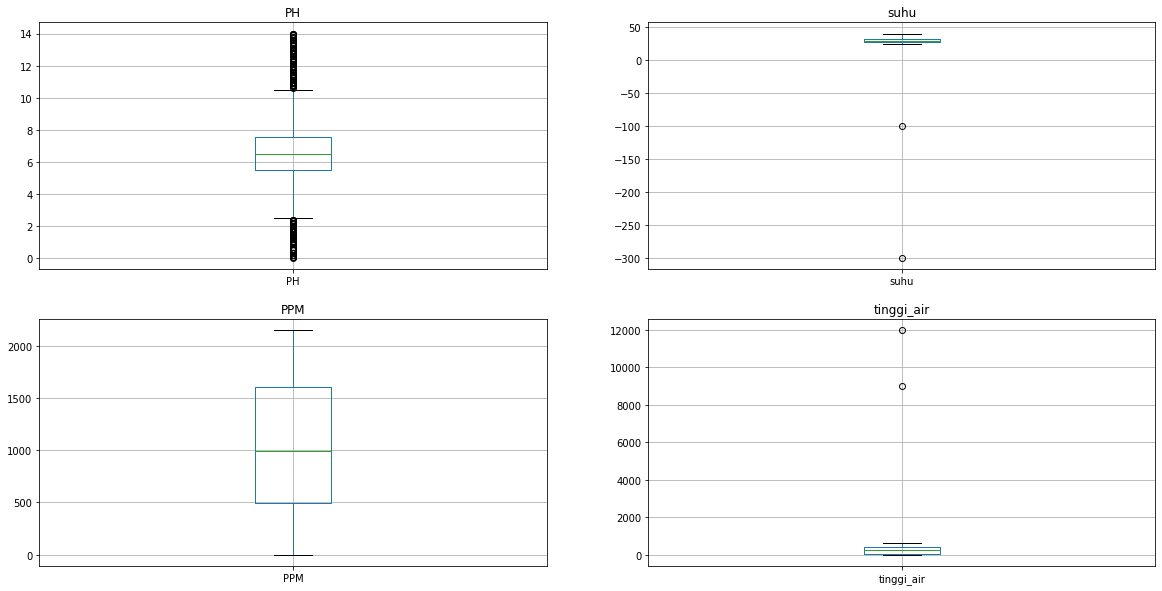

In [23]:
nrows=2
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        ax[i][j].set_title(num_cols[i][j])
        df[[num_cols[i][j]]].boxplot(ax=ax[i][j])
plt.show()

### Suhu

`ambil nilai suhu yang lebih dari nol saja`

In [24]:
df[df.suhu < 0]

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
109,5.7,Tidak ada,Cukup,-300.0,1991.0,624,Tidak melakukan apa-apa
118,5.9,Tidak ada,Cukup,-100.0,1443.0,401,Tidak melakukan apa-apa


In [25]:
df = df[df.suhu > 0]

### Tinggi air

In [26]:
df[df.tinggi_air < 8000]['tinggi_air'].max()

629

`ambil nilai dibawah 700`

In [27]:
df = df[df.tinggi_air < 700]

### Visualisasi kembali

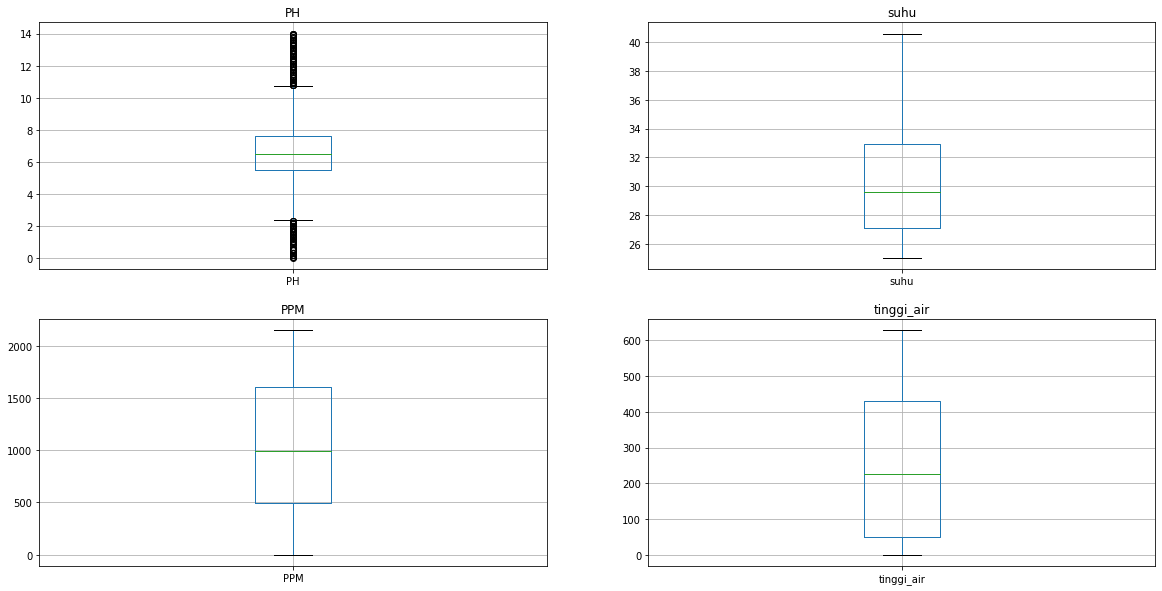

In [28]:
nrows=2
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        ax[i][j].set_title(num_cols[i][j])
        df[[num_cols[i][j]]].boxplot(ax=ax[i][j])
plt.show()

`Pada feature PH kami menganggap nilainya bukan pencilan karena masih dalam rentan nilai PH (1-14)`

# Cek Imbalance data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


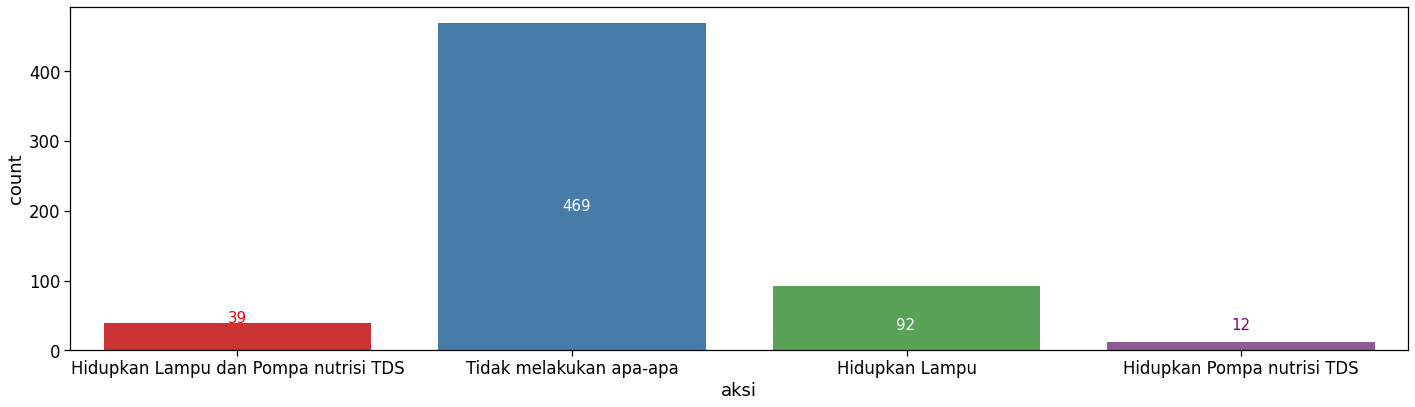

In [29]:
plt.figure(figsize=(20,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('aksi',data=df, palette="Set1")
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Lampu dan Pompa nutrisi TDS'].count()), xy=(-0.2, 250), xytext=(-0.03, 40), size=15, color='r')
plt.annotate(''+str(df['aksi'][df['aksi']=='Tidak melakukan apa-apa'].count()), xy=(-0.2, 100), xytext=(0.97, 200), size=15, color='w')
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Lampu'].count()), xy=(-0.2, 100), xytext=(1.97, 30), size=15, color='w')
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Pompa nutrisi TDS'].count()), xy=(-0.2, 100), xytext=(2.97, 30), size=15, color='purple')
plt.tight_layout()
plt.show()

In [30]:
df.intensitas_air.unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

# Encoding

In [31]:
df_backup = df.copy(deep=True)

In [32]:
#applymap dengan dict untuk label encoding
mapping = {'Rendah sekali': 1,
           'Rendah': 2,
           'Cukup': 3,
           'Tinggi': 4}
df.intensitas_air = df[['intensitas_air']].applymap(mapping.get)

In [33]:
# # one hot encoding cahaya
# cahaya = pd.get_dummies(df.cahaya, prefix='cahaya_')
# df = pd.concat([df, cahaya], axis=1)
# df.drop(columns='cahaya', inplace=True)
# df.head()

In [34]:
df.cahaya.unique()

array(['Ada', 'Tidak ada'], dtype=object)

In [35]:
#applymap dengan dict untuk label encoding
mapping2 = {'Tidak ada': 0,
           'Ada': 1}
df.cahaya = df[['cahaya']].applymap(mapping2.get)

In [36]:
#applymap dengan dict untuk label encoding
mapping3 = {'Tidak melakukan apa-apa': 1,
           'Hidupkan Lampu': 2,
           'Hidupkan Pompa nutrisi TDS': 3,
           'Hidupkan Lampu dan Pompa nutrisi TDS': 4}
df.aksi = df[['aksi']].applymap(mapping3.get)
df.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1,4,27.0,188.0,622,4
1,5.7,1,4,26.9,79.0,557,4
2,6.0,1,4,27.0,11.0,491,4
4,6.2,1,4,27.1,602.0,444,1
5,6.1,1,4,27.0,561.0,405,2


In [37]:
df.corr()['aksi'].to_frame()

,aksi
PH,0.104946
cahaya,0.341421
intensitas_air,-0.045024
suhu,-0.530751
PPM,-0.271730
tinggi_air,0.098685
aksi,1.000000


In [38]:
X = df.drop(columns="aksi")
y = df.aksi

# Handle dengan SMOTE

In [39]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (612, 6)
Shape of X after SMOTE: (1876, 6)


In [42]:
X_sm

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air
0,6.500000,1,4,27.000000,188.000000,622
1,5.700000,1,4,26.900000,79.000000,557
2,6.000000,1,4,27.000000,11.000000,491
3,6.200000,1,4,27.100000,602.000000,444
4,6.100000,1,4,27.000000,561.000000,405
...,...,...,...,...,...,...
1871,10.137467,1,3,26.678660,215.389534,395
1872,6.720873,1,1,26.750727,129.848207,225
1873,2.700360,1,1,27.000000,85.556357,489
1874,5.358368,1,2,26.540852,84.927415,135


In [43]:
df_smote = pd.concat([X_sm, y_sm], axis=1)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1,4,27.0,188.0,622,4
1,5.7,1,4,26.9,79.0,557,4
2,6.0,1,4,27.0,11.0,491,4
3,6.2,1,4,27.1,602.0,444,1
4,6.1,1,4,27.0,561.0,405,2


In [44]:
df_smote.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

# Visualize

In [45]:
df[df['aksi'] == 4].shape

(39, 7)

In [46]:
df_smote[df_smote['aksi'] == 4].shape

(469, 7)

### Swap numeric menjadi kategoric lagi untuk visualisasi

In [47]:
df_smote['intensitas_air'].unique()

array([4, 3, 2, 1])

In [48]:
{value: key for key, value in mapping.items()}

{1: 'Rendah sekali', 2: 'Rendah', 3: 'Cukup', 4: 'Tinggi'}

In [49]:
df_smote['intensitas_air'] = df_smote[['intensitas_air']].applymap({value: key for key, value in mapping.items()}.get)
df_smote['cahaya'] = df_smote[['cahaya']].applymap({value: key for key, value in mapping2.items()}.get)
df_smote['aksi'] = df_smote[['aksi']].applymap({value: key for key, value in mapping3.items()}.get)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.2,Ada,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
4,6.1,Ada,Tinggi,27.0,561.0,405,Hidupkan Lampu


### PH 

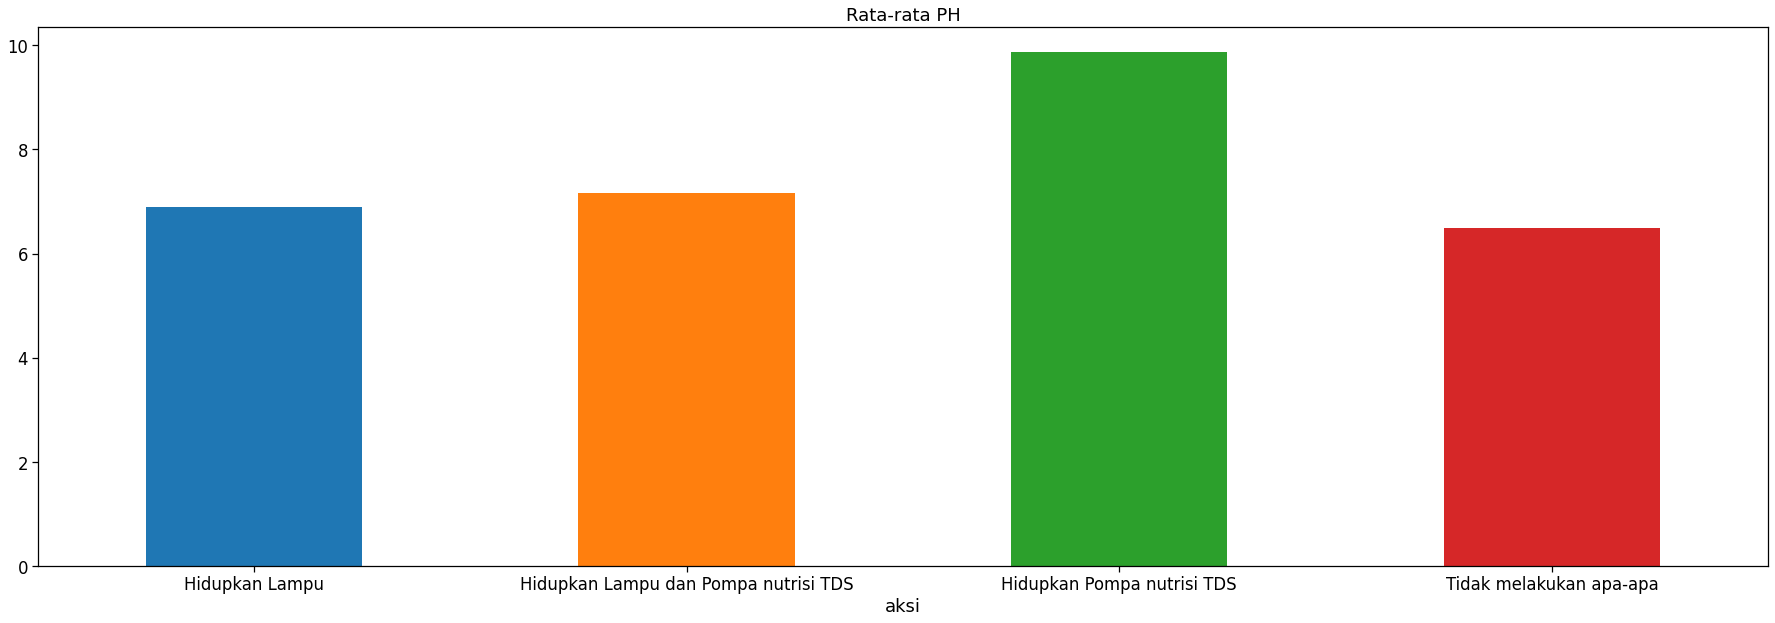

In [50]:
import matplotlib.colors as mcolors
plt.figure(figsize=(25,9))
df_smote.groupby('aksi')['PH'].mean().plot(kind='bar',color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.xticks(rotation=0)
plt.title("Rata-rata PH")
plt.tight_layout()
plt.show()

In [51]:
ph_aksi = df_smote.groupby('aksi')['PH'].mean().reset_index()
ph_aksi

,aksi,PH
0,Hidupkan Lampu,6.895240
1,Hidupkan Lampu dan Pompa nutrisi TDS,7.169823
2,Hidupkan Pompa nutrisi TDS,9.863474
3,Tidak melakukan apa-apa,6.488714


In [52]:
ph_aksi.iloc[0]['PH']

6.895239500080177

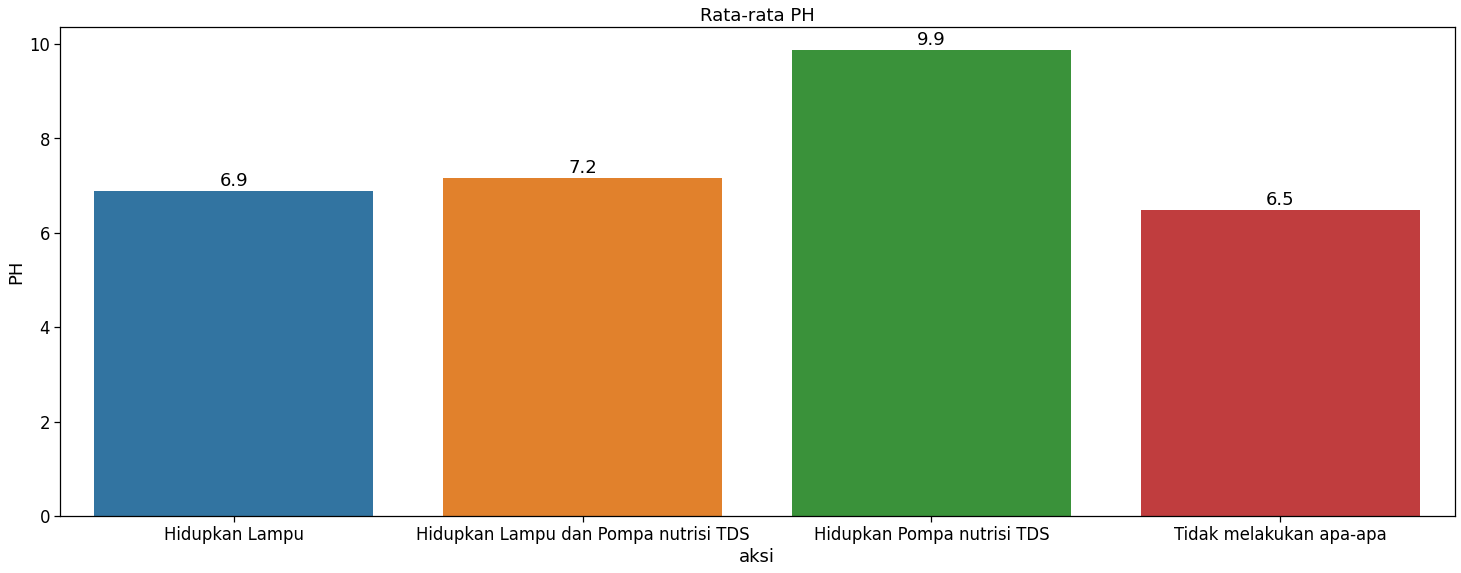

In [53]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='PH', data=ph_aksi)
plt.title("Rata-rata PH")
# plt.annotate(str(ph_aksi.iloc[0]['PH']), xy=(-0.4, 2), xytext=(-0.29, 2), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[1]['PH']), xy=(0.7, 3), xytext=(0.7, 3), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[2]['PH']), xy=(1.7, 6), xytext=(1.7, 6), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[3]['PH']), xy=(1.7, 3), xytext=(2.7, 3), size=20, color='w')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

### Intensitas Air

In [54]:
df_smote.intensitas_air.unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

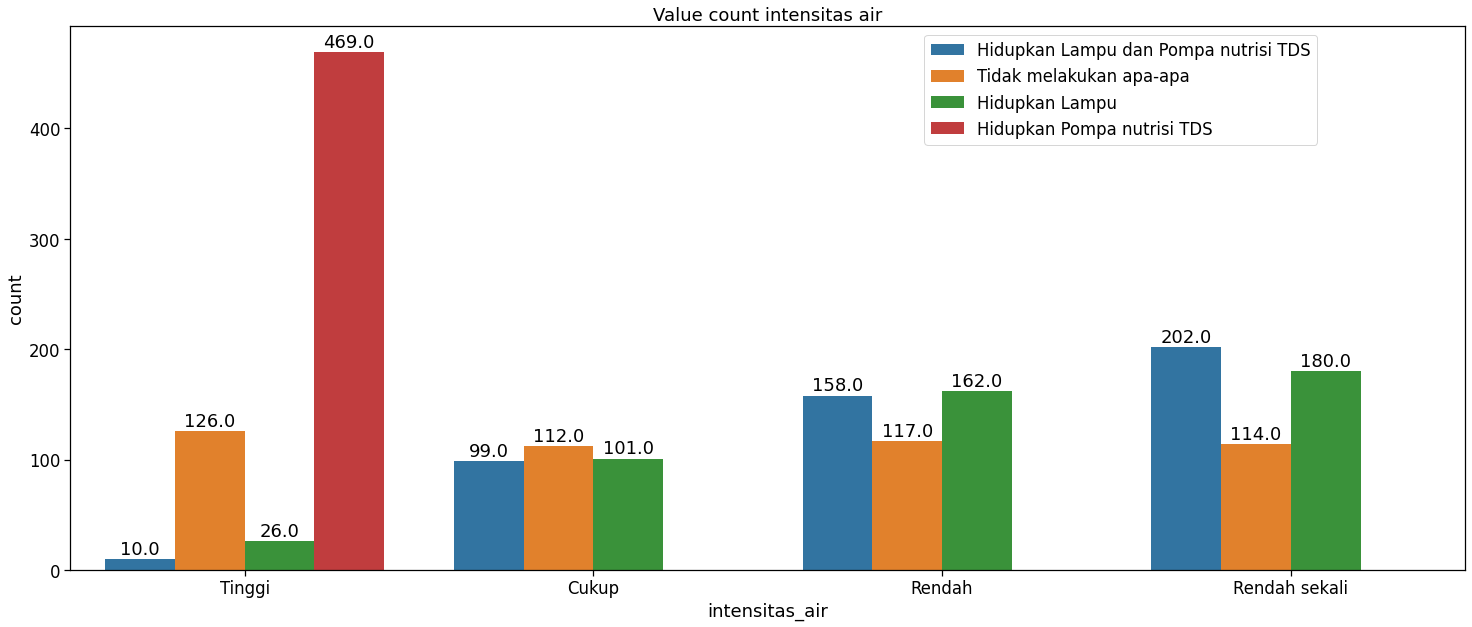

In [55]:
plt.figure(figsize=(25,10))
splot = sns.countplot(x='intensitas_air', hue='aksi', data=df_smote)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Value count intensitas air")
plt.legend(bbox_to_anchor=(0.9,1))
plt.show()

### Cahaya

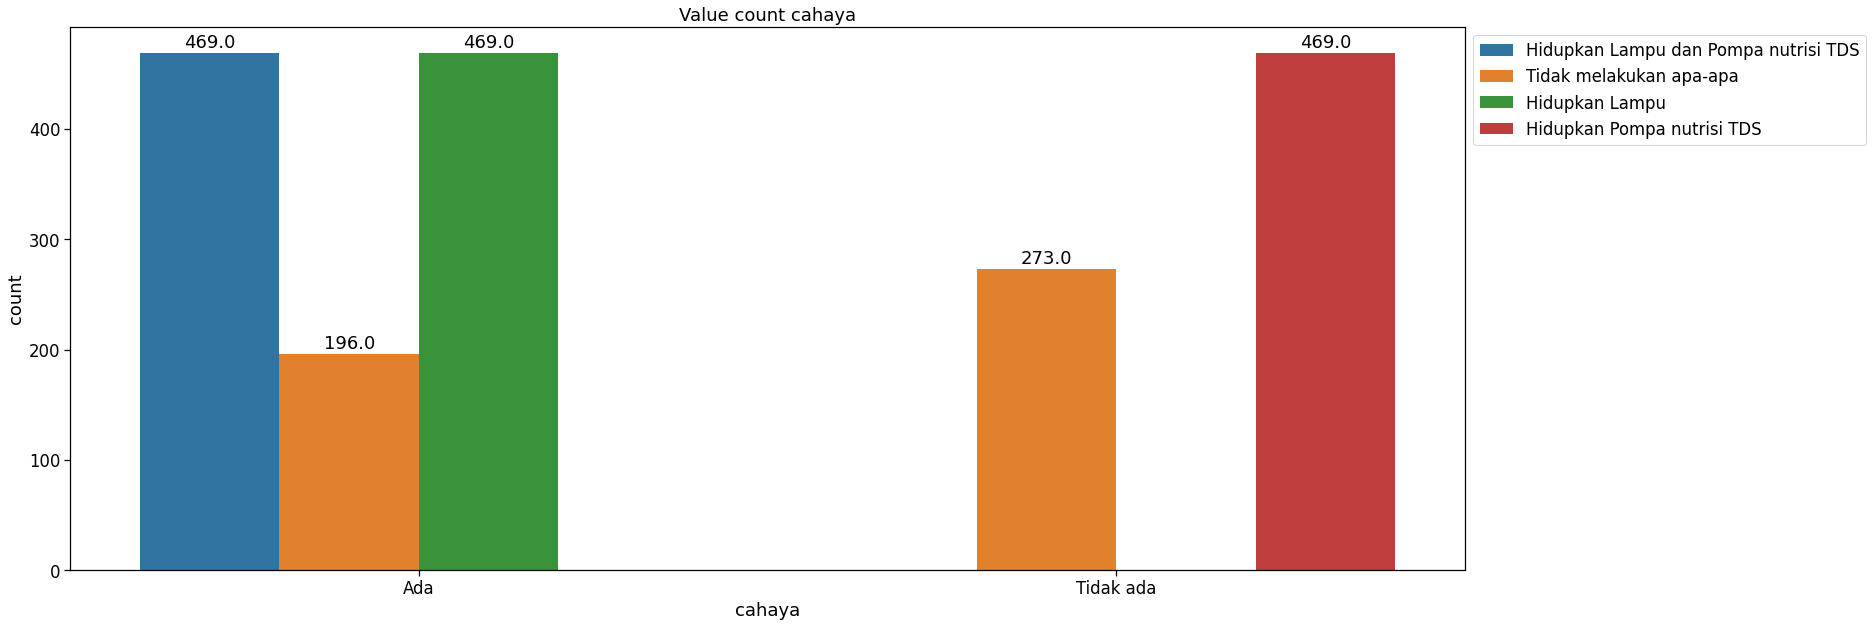

In [56]:
plt.figure(figsize=(25,10))
splot = sns.countplot(x='cahaya', hue='aksi', data=df_smote)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Value count cahaya")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Suhu

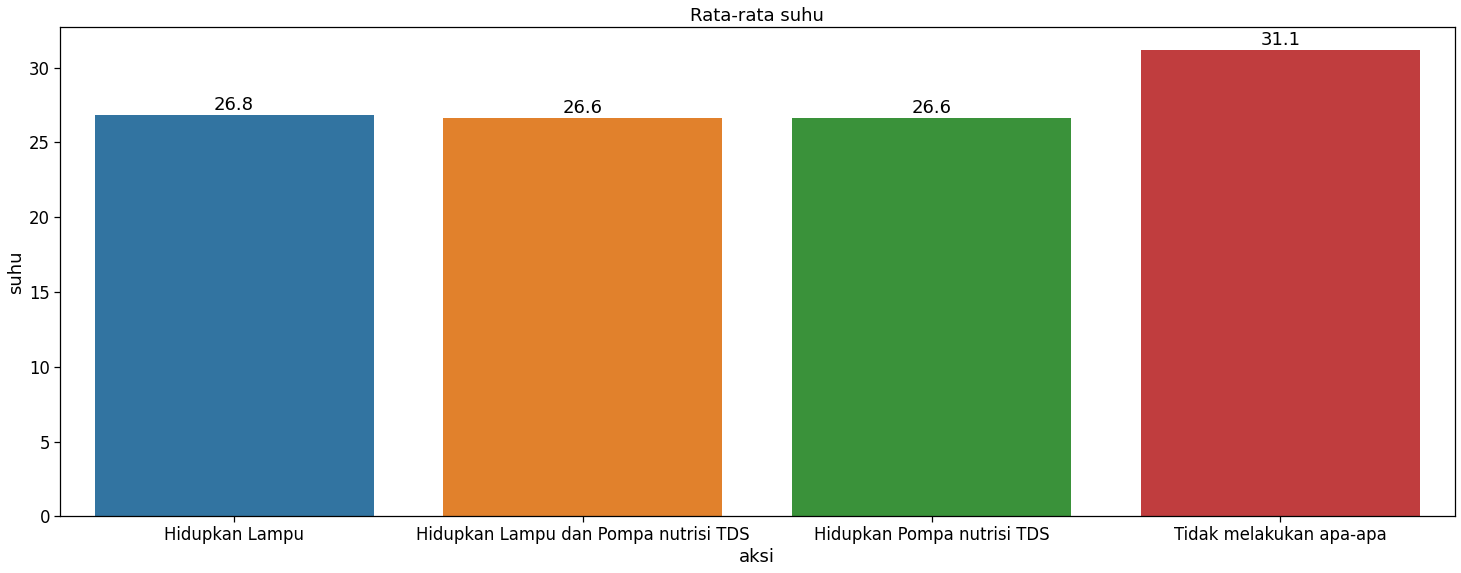

In [57]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='suhu', data=df_smote.groupby('aksi')['suhu'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata suhu")
plt.show()

### PPM

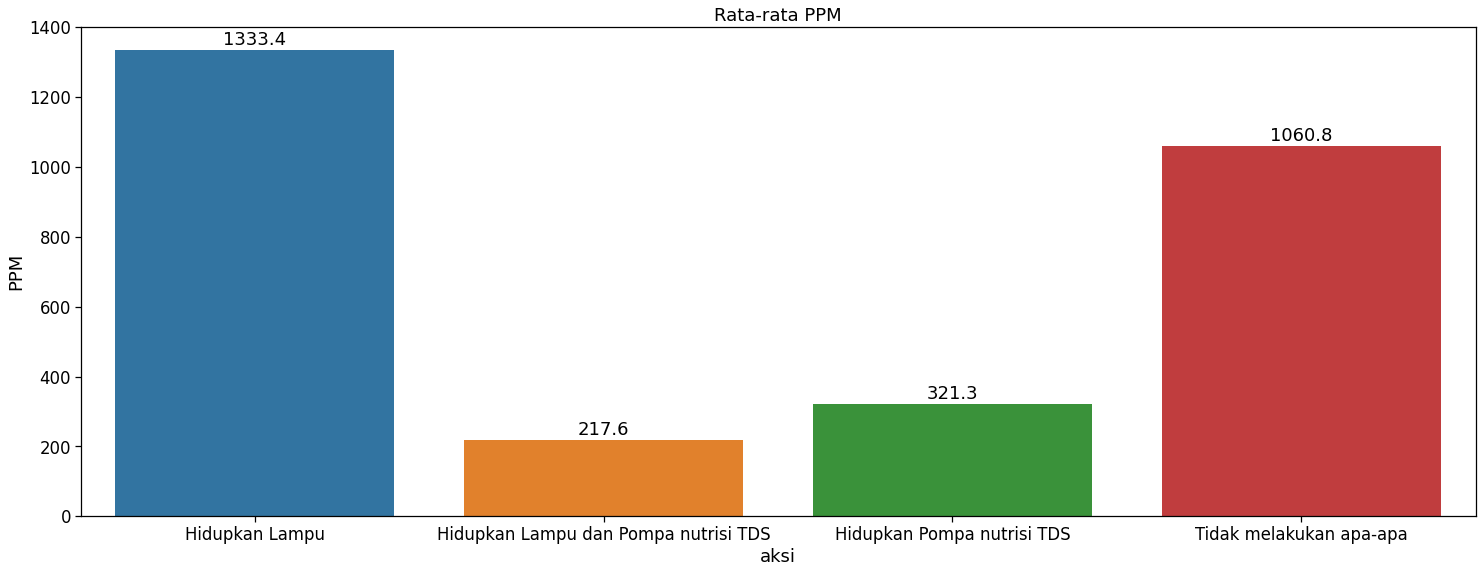

In [58]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='PPM', data=df_smote.groupby('aksi')['PPM'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata PPM")
plt.show()

### Tinggi air

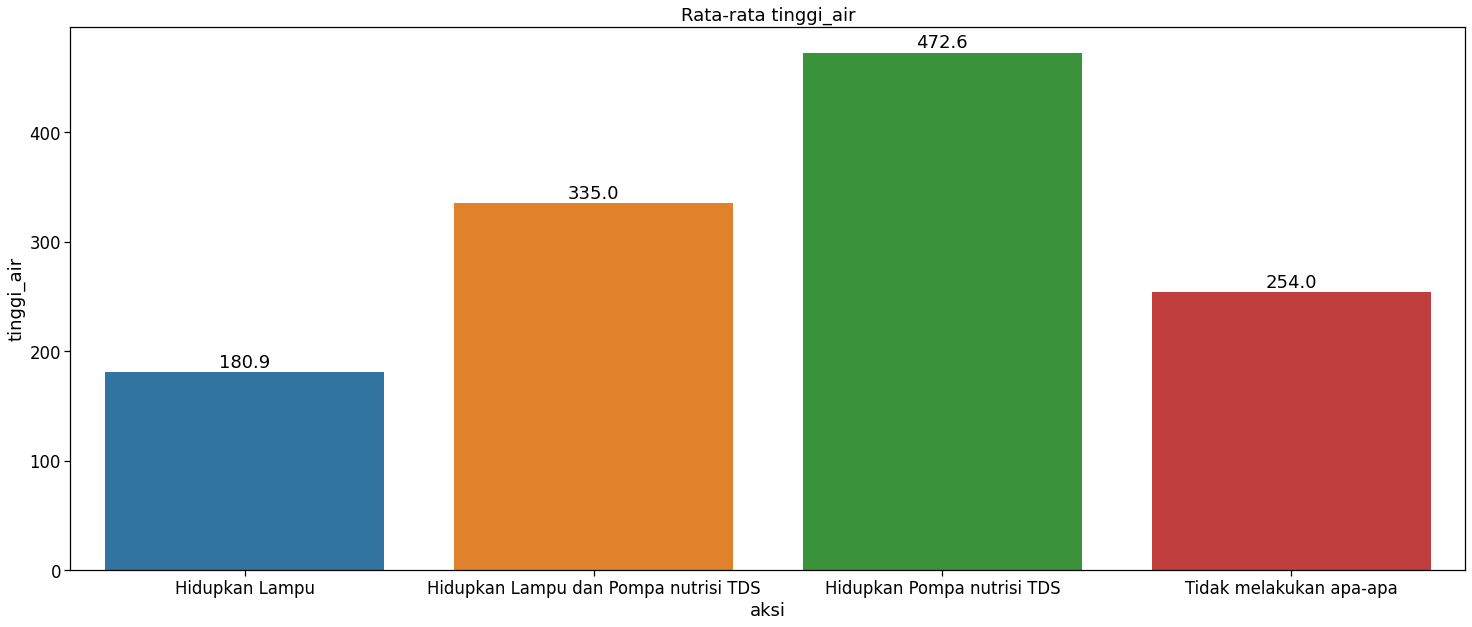

In [59]:
plt.figure(figsize=(25,10))
splot = sns.barplot(x='aksi', y='tinggi_air', data=df_smote.groupby('aksi')['tinggi_air'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata tinggi_air")
plt.show()

In [60]:
df_smote.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

### Encode kembali

In [61]:
df_smote['intensitas_air'] = df_smote[['intensitas_air']].applymap(mapping.get)
df_smote['cahaya'] = df_smote[['cahaya']].applymap(mapping2.get)
# df_smote['aksi'] = df_smote[['aksi']].applymap(mapping3.get)
# one hot encoding cahaya
aksi = pd.get_dummies(df_smote.aksi, prefix='aksi')
df_smote = pd.concat([df_smote, aksi], axis=1)
df_smote.drop(columns='aksi', inplace=True)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi_Hidupkan Lampu,aksi_Hidupkan Lampu dan Pompa nutrisi TDS,aksi_Hidupkan Pompa nutrisi TDS,aksi_Tidak melakukan apa-apa
0,6.5,1,4,27.0,188.0,622,0,1,0,0
1,5.7,1,4,26.9,79.0,557,0,1,0,0
2,6.0,1,4,27.0,11.0,491,0,1,0,0
3,6.2,1,4,27.1,602.0,444,0,0,0,1
4,6.1,1,4,27.0,561.0,405,1,0,0,0


In [62]:
df_smote.isnull().sum()

PH                                           0
cahaya                                       0
intensitas_air                               0
suhu                                         0
PPM                                          0
tinggi_air                                   0
aksi_Hidupkan Lampu                          0
aksi_Hidupkan Lampu dan Pompa nutrisi TDS    0
aksi_Hidupkan Pompa nutrisi TDS              0
aksi_Tidak melakukan apa-apa                 0
dtype: int64

# Build ANN model

In [63]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [64]:
feature = list(df_smote.columns[:6])
target = list(df_smote.columns[6:])
target

['aksi_Hidupkan Lampu',
 'aksi_Hidupkan Lampu dan Pompa nutrisi TDS',
 'aksi_Hidupkan Pompa nutrisi TDS',
 'aksi_Tidak melakukan apa-apa']

In [65]:
df_smote.isnull().sum()

PH                                           0
cahaya                                       0
intensitas_air                               0
suhu                                         0
PPM                                          0
tinggi_air                                   0
aksi_Hidupkan Lampu                          0
aksi_Hidupkan Lampu dan Pompa nutrisi TDS    0
aksi_Hidupkan Pompa nutrisi TDS              0
aksi_Tidak melakukan apa-apa                 0
dtype: int64

In [66]:
X = df_smote[feature]
y = df_smote[target]


In [67]:
from sklearn.preprocessing import RobustScaler

scaler =  RobustScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.22909085  0.          0.33333333  0.17151754 -0.29030812  0.79829545]
 [-0.46671443  0.          0.33333333  0.06573915 -0.41118536  0.61363636]
 [-0.37760559  0.          0.33333333  0.17151754 -0.48659502  0.42613636]
 ...
 [-1.3576958   0.         -0.66666667  0.17151754 -0.40391459  0.42045455]
 [-0.56818912  0.         -0.33333333 -0.31416201 -0.40461206 -0.58522727]
 [-0.02263382  0.         -0.66666667  0.13604902 -0.06340325 -0.23863636]]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 6), (376, 6), (1500, 4), (376, 4))

In [69]:
model = keras.Sequential([
        keras.layers.Dense(units=8, input_shape=(6,)),
        keras.layers.Dense(units=16, activation='relu'),
        keras.layers.Dense(units=4, activation='softmax')
])

In [70]:
# isi code
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback=EarlyStopping(monitor="val_loss",patience=50, verbose=1, mode='min')
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [72]:
# isi code
history = model.fit(X_train, y_train, epochs=100,
                    callbacks=[callback, check_point],
                    validation_split=0.1)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 1.2504 - accuracy: 0.3170 - val_loss: 1.2145 - val_accuracy: 0.3533

Epoch 00001: val_accuracy improved from -inf to 0.35333, saving model to best_model.h5
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 1.2257 - accuracy: 0.3267 - val_loss: 1.1959 - val_accuracy: 0.3533

Epoch 00002: val_accuracy did not improve from 0.35333
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 1.2061 - accuracy: 0.3393 - val_loss: 1.1801 - val_accuracy: 0.3667

Epoch 00003: val_accuracy improved from 0.35333 to 0.36667, saving model to best_model.h5
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 1.1887 - accuracy: 0.3459 - val_loss: 1.1664 - val_accuracy: 0.3667

Epoch 00004: val_accuracy did not improve from 0.36667
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 1.1734 - accuracy: 0.3548 - val_loss: 1.1539 - val_accuracy: 0.3800

Epo

In [74]:
from tensorflow.keras.models import load_model
# load model 2 untuk digunakan lagi dari file
best_model = load_model('best_model.h5')

loss, acc = best_model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy_model_3: %.3f' % acc)


12/12 [==============================] - 0s 976us/step - loss: 0.5083 - accuracy: 0.9016
Test Accuracy_model_3: 0.902


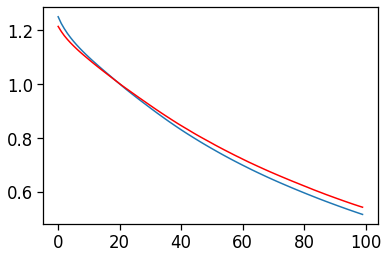

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], c='r')
plt.show()